# 1 - Find , Plot and Analyze

## Plotting Histograms

#### Using Matplotlib Plotting Functions

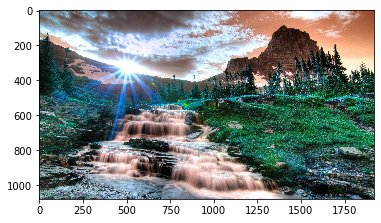

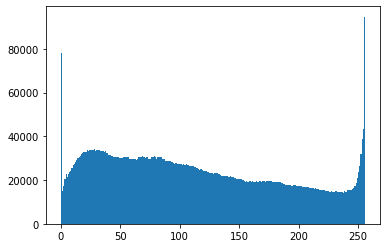

In [4]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

filepath = "C:\\Users\\Aung Thiha\\Computer Vision with Python\\Image Data Sets\\nature.jpg"
img = cv2.imread(filepath)

plt.imshow(img)
plt.show()

plt.hist(img.ravel(),256,[0,256])
plt.show()

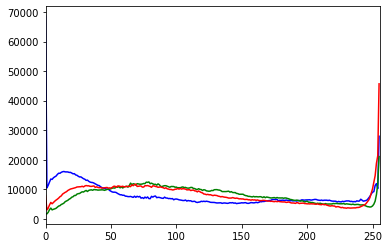

In [5]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

filepath = "C:\\Users\\Aung Thiha\\Computer Vision with Python\\Image Data Sets\\nature.jpg"
img = cv2.imread(filepath)
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

### Using OpenCv Drawing Functions

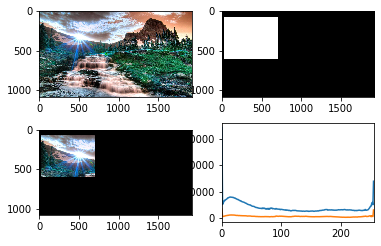

In [8]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

filepath = "C:\\Users\\Aung Thiha\\Computer Vision with Python\\Image Data Sets\\nature.jpg"
img = cv2.imread(filepath)

# create a mask
mask = np.zeros(img.shape[:2], np.uint8)
mask[70:600, 20:700] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)

# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])

plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full), plt.plot(hist_mask)
plt.xlim([0,256])

plt.show()

# 2 - Histogram Equalization

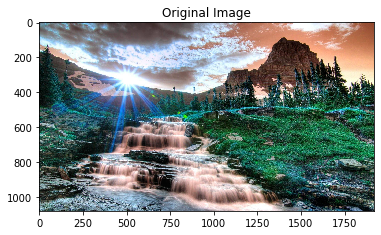

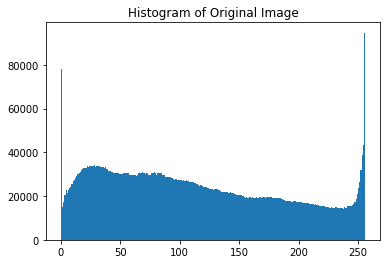

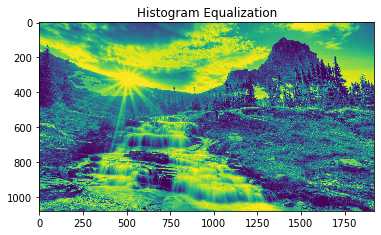

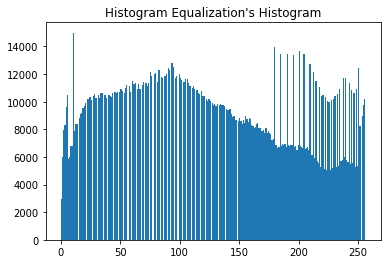

In [22]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

filepath = "C:\\Users\\Aung Thiha\\Computer Vision with Python\\Image Data Sets\\nature.jpg"
img = cv2.imread(filepath)

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

plt.imshow(img)
plt.title("Original Image")
plt.show()

plt.hist(img.ravel(),256,[0,256])
plt.title("Histogram of Original Image")
plt.show()

equ = cv2.equalizeHist(gray)
plt.title("Histogram Equalization")
plt.imshow(equ)
plt.show()

#cv2.imshow("Histogram Equalization",gray)

plt.hist(equ.ravel(),256,[0,256])
plt.title("Histogram Equalization's Histogram")
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

# 3 - Histograms 2D

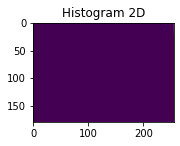

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

cv2.namedWindow("GOAT1",cv2.WINDOW_NORMAL)
cv2.namedWindow("GOAT2",cv2.WINDOW_NORMAL)
filepath = "C:\\Users\\Aung Thiha\\Computer Vision with Python\\Image Data Sets\\flashlogo.jpg"
img = cv2.imread(filepath)

hsv = cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
h,s,v = cv2.split(hsv)

hist, xbins, ybins = np.histogram2d(h.ravel(),s.ravel(),[180,256],[[0,180],[0,256]])
#hist = cv2.calcHist(hsv,[0,1],None,[180,256],[0,180,0,256])

#plt.subplot(221),plt.imshow(img),plt.title("Original")
#plt.subplot(222),plt.imshow(hsv),plt.title("HSV")
plt.subplot(223),plt.imshow(hist),plt.title("Histogram 2D")
plt.show()

cv2.imshow("GOAT1",img)
cv2.imshow("GOAT2",hist)

cv2.waitKey(0)
cv2.destroyAllWindows()

# 4 - Histogram Backprojection

In [4]:
# https://www.youtube.com/watch?v=0rYtZtY5ML4

import cv2
import matplotlib.pyplot as plt
import numpy as np

cv2.namedWindow("Histogram Backprojection B&W" , cv2.WINDOW_NORMAL)
cv2.namedWindow("Histogram Backprojection Color" , cv2.WINDOW_NORMAL)
cv2.namedWindow("Original Image" , cv2.WINDOW_NORMAL)
cv2.namedWindow("ROI Image" , cv2.WINDOW_NORMAL)
original_image = cv2.imread("C:\\Users\\Aung Thiha\\Computer Vision with Python\\Image Data Sets\\fruit.jpeg")
roi_image = cv2.imread("C:\\Users\\Aung Thiha\\Computer Vision with Python\\Image Data Sets\\apple.jpeg")

hsv_original = cv2.cvtColor(original_image,cv2.COLOR_BGR2HSV)
hsv_roi = cv2.cvtColor(roi_image,cv2.COLOR_BGR2HSV)

hist_roi = cv2.calcHist([hsv_roi], [0, 1], None, [180, 256], [0, 180, 0, 256])
hist_back = cv2.calcBackProject([hsv_original], [0,1] , hist_roi , [0,180,0,256] , 1)

# filter
kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(15,15))
filter = cv2.filter2D(hist_back,-1,kernel)

# morphological
erode = cv2.erode(filter,kernel)
ret , threshold = cv2.threshold(erode,150,255,cv2.ADAPTIVE_THRESH_MEAN_C)

mask = cv2.merge((threshold, threshold, threshold))
result = cv2.bitwise_and(original_image,mask)

cv2.imshow("Histogram Backprojection B&W",mask)
cv2.imshow("Histogram Backprojection Color" , result)
cv2.imshow("Original Image",original_image)
cv2.imshow("ROI Image" , roi_image)

cv2.waitKey(0)
cv2.destroyAllWindows()